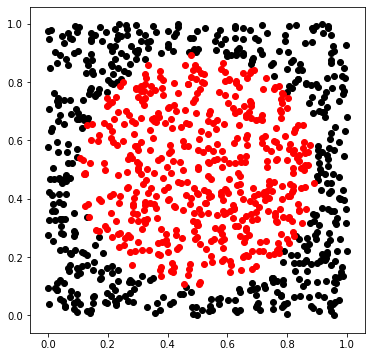

In [1]:
import torch
import math
import matplotlib.pyplot as plt

import Modules
import Sequential
import Optimizer
from helpers import generate_disc_set, plot_data

torch.set_grad_enabled(False)

data, target, data_test, target_test = generate_disc_set(1000, show_data=True)

0 train_loss 737.80 test_error 51.60%
100 train_loss 464.93 test_error 32.80%
200 train_loss 441.72 test_error 40.80%
300 train_loss 375.23 test_error 29.80%
400 train_loss 282.00 test_error 22.60%
500 train_loss 209.11 test_error 15.60%
600 train_loss 177.33 test_error 12.20%
700 train_loss 163.62 test_error 10.00%
800 train_loss 154.81 test_error 9.50%
900 train_loss 145.89 test_error 8.70%
999 train_loss 139.66 test_error 4.90%


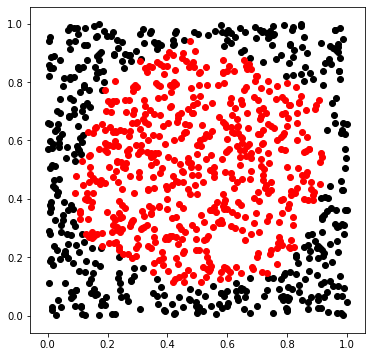

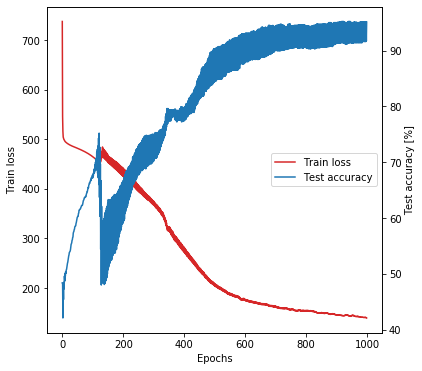

1000


In [2]:
# Train 

nb_epochs = 1000
losses = []

# Modules sequence
m1 = Modules.Linear(2,25)
m2 = Modules.Linear(25,25)
m3 = Modules.Linear(25,25)
m4 = Modules.Linear(25,2)
relu1 = Modules.ReLu()
relu2 = Modules.ReLu()
tanh1 = Modules.Tanh()
tanh2 = Modules.Tanh()
sequence = Modules.Sequential(m1, relu1, m2, relu2, m3, tanh1, m4, tanh2)

# loss criterion
MSE = Modules.MSE()

# Optimizer
#sgd = Optimizer.SGD(sequence)

# train
losses = []
test_accs = []
for e in range(nb_epochs):
    output = sequence(data)
    loss = MSE(output, target)
    sequence.zero_grad()
    sequence.backward(MSE.backward(output, target))
    sequence.step()
    losses.append(loss.item())
    
    test_out = sequence(data_test)
    
    
    predicted_test_classes = test_out.max(1)[1]
    nb_errors = torch.where(target_test != predicted_test_classes)[0].size(0)
    test_accs.append(100 - ((100 * nb_errors) / data_test.size(0)))

    if e%100 == 0:
        print('{:d} train_loss {:.02f} test_error {:.02f}%'.format(e, loss, (100 * nb_errors) / data_test.size(0)))
        #plot_data(data_test, predicted_test_classes)
        
print('{:d} train_loss {:.02f} test_error {:.02f}%'.format(e, loss, (100 * nb_errors) / data_test.size(0)))
plot_data(data_test, predicted_test_classes)

fig, ax1 = plt.subplots(figsize=(6,6))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train loss')
plt1 = ax1.plot(range(len(losses)), losses, color='tab:red', label='Train loss')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  
ax2.set_ylabel('Test accuracy [%]')  
plt2 = ax2.plot(range(len(test_accs)), test_accs, color='tab:blue', label='Test accuracy')
ax2.tick_params(axis='y')

plts = plt1+plt2
labs = [p.get_label() for p in plts]
plt.legend(plts, labs, loc='center right')
plt.show()

print(len(test_accs))